In [12]:
import os
import librosa  
import librosa.display
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, fft
from tqdm import tqdm

In [3]:
music_genres_dir = '../GTZAN_Dataset/genres_original/'
!ls $music_genres_dir

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

blues  classical  country  disco  hiphop  jazz	metal  pop  reggae  rock


In [13]:
audio_files = []
labels=[]

for genre in genres :
    genre_path = os.path.join(music_genres_dir, genre)
    for audio_file in tqdm(os.listdir(genre_path)):
        if audio_file.endswith('.wav'):
            audio_files.append(os.path.join(genre_path, audio_file))
            labels.append(genre)

print(f"Number of audio files: {len(audio_files)}")
# create a dataframe
df = pd.DataFrame({'filename': audio_files, 'genre': labels})
df.head()

100%|██████████| 100/100 [00:00<00:00, 370194.53it/s]

Number of audio files: 999


,filename,genre
0,../GTZAN_Dataset/genres_original/blues/blues.0...,blues
1,../GTZAN_Dataset/genres_original/blues/blues.0...,blues
2,../GTZAN_Dataset/genres_original/blues/blues.0...,blues
3,../GTZAN_Dataset/genres_original/blues/blues.0...,blues
4,../GTZAN_Dataset/genres_original/blues/blues.0...,blues


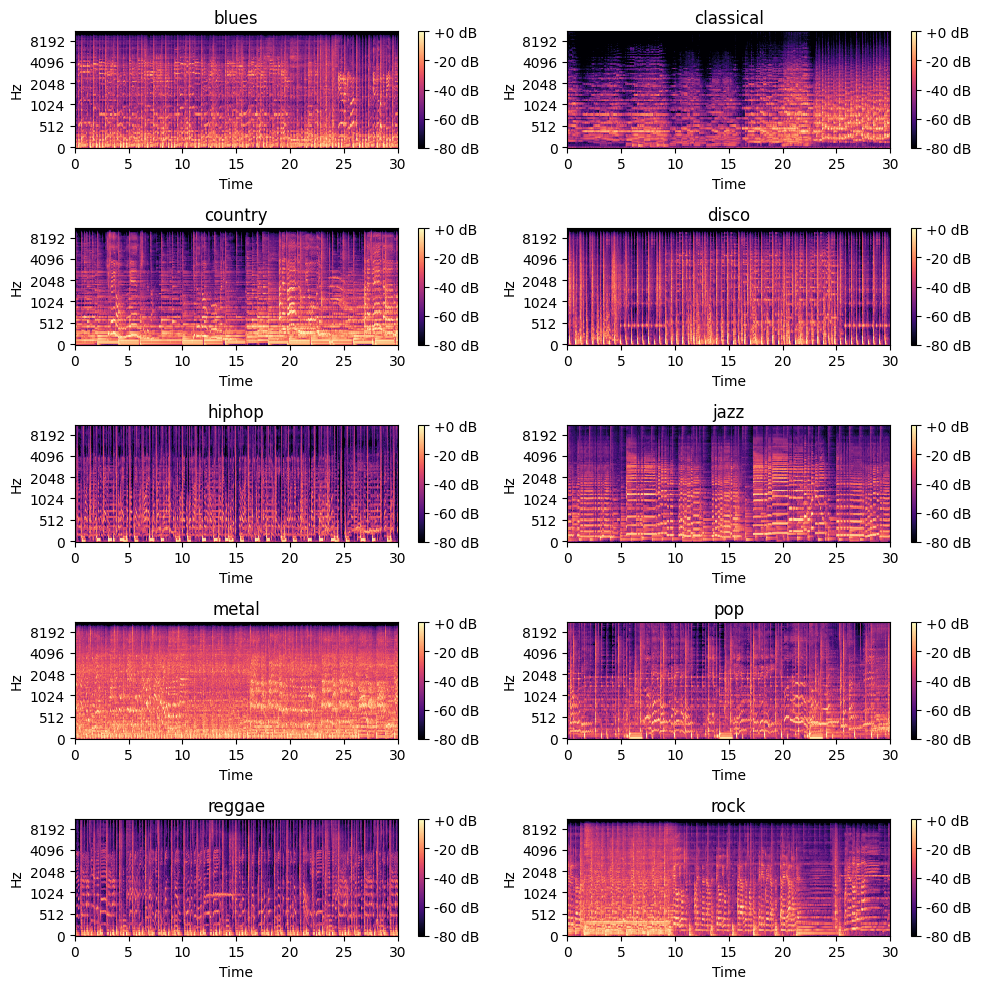

In [15]:
# plot the melspectrogram of the first audio file from each genre 
plt.figure(figsize=(10, 10))
for i, genre in enumerate(genres):
    plt.subplot(5, 2, i+1)
    audio_file = df[df['genre'] == genre].iloc[0]['filename']
    y, sr = librosa.load(audio_file)
    melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(genre)
plt.tight_layout()
plt.show()


In [16]:
# normalize the melpsctrogram
def normalize_melspec(melspec):
    return (melspec - np.mean(melspec)) / np.std(melspec)

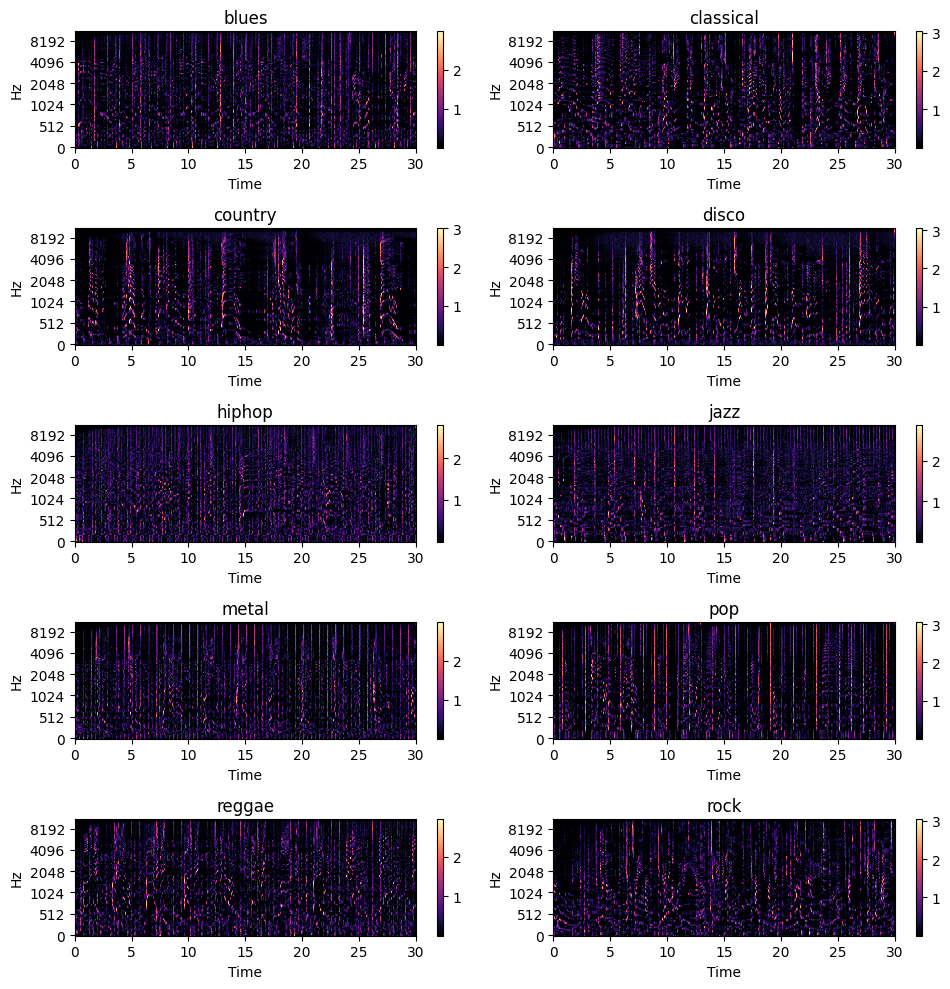

In [17]:
normalized_specs = []
for audio_file in audio_files:
    y, sr = librosa.load(audio_file)
    melspec = librosa.feature.melspectrogram(y=y, sr=sr)
    normalized_spec = librosa.pcen(melspec)
    normalized_specs.append(normalized_spec)

# Visualize normalized spectrograms
plt.figure(figsize=(10, 10))
for i, genre in enumerate(genres):
    plt.subplot(5, 2, i+1)
    librosa.display.specshow(normalized_specs[i], y_axis='mel', x_axis='time')
    plt.colorbar()
    plt.title(genre)
plt.tight_layout()
plt.show()

In [18]:
# Create directory if it doesn't exist
save_dir = 'normalized_spectrograms'
os.makedirs(save_dir, exist_ok=True)

# Save normalized spectrograms by genre
for genre in genres:
   genre_dir = os.path.join(save_dir, genre)
   os.makedirs(genre_dir, exist_ok=True)
   
   genre_files = df[df['genre'] == genre]['filename']
   
   for file in tqdm(genre_files, desc=f'Processing {genre}'):
       y, sr = librosa.load(file)
       melspec = librosa.feature.melspectrogram(y=y, sr=sr)
       normalized_spec = librosa.pcen(melspec)
       
       # Get filename without extension and path
       filename = os.path.splitext(os.path.basename(file))[0]
       save_path = os.path.join(genre_dir, f'{filename}.npy')
       
       np.save(save_path, normalized_spec)

Processing rock: 100%|██████████| 100/100 [00:09<00:00, 11.00it/s]
